# May need derivatives of modes for Z along SDP, not real

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
%matplotlib widget
plt.style.use('dark_background')

In [2]:
max_loss_wl = 6.90764472e-06
A = SlabExact(scale=1e-5, Ts=[5, 1, 8, 1, 5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[500, 300, 300, 300, 500],
              symmetric=True, wl=max_loss_wl)

## Simple estimates

In [49]:
Z0 = 1e-9
dZ = 1e-2 * Z0
sign = -1

In [50]:
SDP0 = Z0 + 1j * A.sdp_Z(Z0, sdp_sign=sign)
SDP1 = Z0 + dZ + 1j * A.sdp_Z(Z0 + dZ, sdp_sign=sign)
SDPdZ = SDP1 - SDP0

In [51]:
F0 = A.fields_Z(SDP0, mode_type='radiation')
dF = A.fields_Z(SDP1, mode_type='radiation')

In [57]:
dFdZ = lambda x, z=0: (dF(x, zs=z) - F0(x, zs=z)) / SDPdZ
DFdZ = lambda x, z: (dF(x, z) - F0(x, z)) / SDPdZ

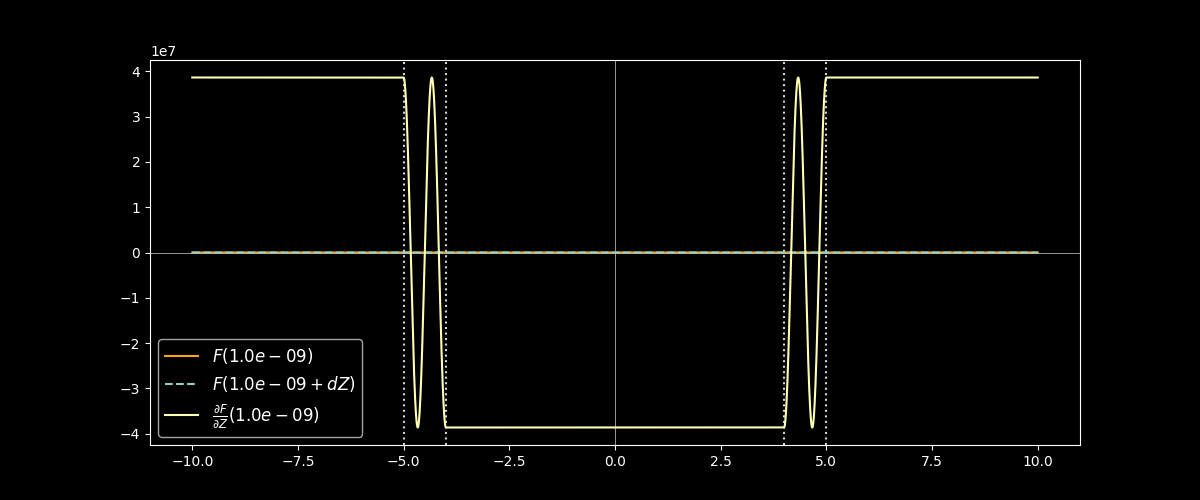

In [59]:
A.plot_field_1d(F0, label='$F(%.1e)$'%Z0, color='orange')
A.add_1d_plot(dF, label='$F(%.1e + dZ)$'%Z0, linestyle='--')
A.add_1d_plot(dFdZ, label='$\\frac{\partial F}{\partial Z}(%.1e)$'%Z0, part='real')